# Single Qubit Topological Gates

<hr>

<table width="100%"><tr><td style="color:#bbbbbb;background-color:#ffffff;font-size:11px;font-style:italic;text-align:right;">This cell contains some macros. If there is a problem with displaying mathematical formulas, please run this cell to load these macros. </td></tr></table>
$ \newcommand{\bra}[1]{\langle #1|} $
$ \newcommand{\ket}[1]{|#1\rangle} $
$ \newcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \newcommand{\dot}[2]{ #1 \cdot #2} $
$ \newcommand{\biginner}[2]{\left\langle #1,#2\right\rangle} $
$ \newcommand{\mymatrix}[2]{\left( \begin{array}{#1} #2\end{array} \right)} $
$ \newcommand{\myvector}[1]{\mymatrix{c}{#1}} $
$ \newcommand{\myrvector}[1]{\mymatrix{r}{#1}} $
$ \newcommand{\mypar}[1]{\left( #1 \right)} $
$ \newcommand{\mybigpar}[1]{ \Big( #1 \Big)} $
$ \newcommand{\sqrttwo}{\frac{1}{\sqrt{2}}} $
$ \newcommand{\dsqrttwo}{\dfrac{1}{\sqrt{2}}} $
$ \newcommand{\onehalf}{\frac{1}{2}} $
$ \newcommand{\donehalf}{\dfrac{1}{2}} $
$ \newcommand{\hadamard}{ \mymatrix{rr}{ \sqrttwo & \sqrttwo \\ \sqrttwo & -\sqrttwo }} $
$ \newcommand{\vzero}{\myvector{1\\0}} $
$ \newcommand{\vone}{\myvector{0\\1}} $
$ \newcommand{\stateplus}{\myvector{ \sqrttwo \\  \sqrttwo } } $
$ \newcommand{\stateminus}{ \myrvector{ \sqrttwo \\ -\sqrttwo } } $
$ \newcommand{\myarray}[2]{ \begin{array}{#1}#2\end{array}} $
$ \newcommand{\X}{ \mymatrix{cc}{0 & 1 \\ 1 & 0}  } $
$ \newcommand{\Z}{ \mymatrix{rr}{1 & 0 \\ 0 & -1}  } $
$ \newcommand{\Htwo}{ \mymatrix{rrrr}{ \frac{1}{2} & \frac{1}{2} & \frac{1}{2} & \frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & \frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} \\ \frac{1}{2} & -\frac{1}{2} & -\frac{1}{2} & \frac{1}{2} } } $
$ \newcommand{\CNOT}{ \mymatrix{cccc}{1 & 0 & 0 & 0 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0} } $
$ \newcommand{\norm}[1]{ \left\lVert #1 \right\rVert } $
$ \newcommand{\pstate}[1]{ \lceil \mspace{-1mu} #1 \mspace{-1.5mu} \rfloor } $
$ \newcommand{\qgate}[1]{ \mathop{\textit{#1} } }$

Fibonacci anyons and their braiding operations are thought to be a universal quantum computer. It means that we can construct any arbitrary single qubit gate, especially, $H$ and $T$ gates in addition to the controlled $CNOT$ gate.

In these two notebooks, we will see how to construct universal quantum gates with Fibonacci anyons.

## Drawing Braiding Sequences (Topological quantum circuits)

A topological quantum circuit is determined by the number of anyons $N$ and the sequence of braiding operations. Each braiding operator $\sigma_i^p$ that braids between the $i$'th anyon and the $(i+1)$'th anyon is defined by the *index* $i$ and the *direction of rotation* $p=1$ if clockwise and $p= -1$ if counterclockwise.

Let's draw our topological quantum circuits with a pre-designed Simulator.


In [4]:
from anyon_simulator import AnyonSimulator

A braiding sequence with length $L$ can be written as:

$$ \sigma_{i_L}^{p_L}\cdots \sigma_{i_2}^{p_2} \sigma_{i_1}^{p_1} $$

Notice that braiding operations are applied to the fusion state as a matrix such that the first one to apply is the rightmost. 

If $p>0$, the braiding is in the clockwise direction. If $p<0$, the braiding is in the counterclockwise direction.

We can write this braiding sequence as a list in Python like the following:

$$\texttt{ [[i1, p1], [i2, p2], ..., [iL, pL]]}$$

Let's visualize $\sigma_1$ on 3 anyons.

We know that $\sigma_1$ is the exchange operation of anyon 1 and anyon 2 in clockwise direction.


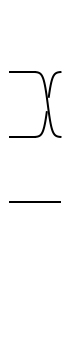

In [9]:
# Create a braiding circuit of 3 anyons
circuit = AnyonSimulator()

# Apply sigma_1 by braiding anyon 1 with anyon 2
circuit.braid(1, 2)

# Draw the circuit
circuit.draw_circuit()

**Time arrow is pointed from left to right**

In [10]:
# Print the braiding sequence
circuit.get_braids_history()

<IPython.core.display.Latex object>

To draw the counterclockwise braid such as $\sigma_1^{-1}$, it is sufficient to flip the order of anyon numbers.

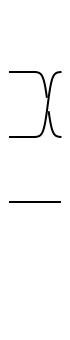

<IPython.core.display.Latex object>

In [11]:
# Draw sigma_1^(-1)
circuit = AnyonSimulator()
circuit.braid(2, 1)
circuit.draw_circuit()
circuit.get_braids_history()

#### Task 1

Draw the following braiding sequence on 3 anyons:

$$ \sigma_{2}^{-1}\sigma_{2}^{-1} \sigma_{1} \sigma_{1} $$

Be carefull to the order of operations!

##### Solution

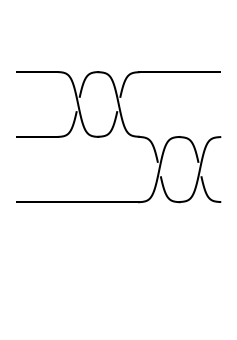

<IPython.core.display.Latex object>

In [12]:
# Braiding sequence
seq = [[1, 1], [1, 1], [2, -1], [2, -1]]

circuit = AnyonSimulator()
circuit.braid(1, 2)
circuit.braid(1, 2)
circuit.braid(3, 2)
circuit.braid(3, 2)
circuit.draw_circuit()

# Print the sequence
circuit.get_braids_history()

<h2> Single Qubit Braiding Operations </h2>



In Fibonacci model, we can encode a single qubit in 3 anyons. Given three Fibonacci anyons, we have 4 braiding operations : $\sigma_1$ and $\sigma_2$ which braids anyons in clockwise direction, $\sigma_1^{-1}$ and $\sigma_2^{-1}$ which braids anyons in couterclockwise direction.


### Diagrammatic Representation of $\sigma_1$, $\sigma_2$, $\sigma_1^{-1}$ and $\sigma_2^{-1}$

#### Task 2

Draw $\sigma_1$, $\sigma_2$, $\sigma_1^{-1}$ and $\sigma_2^{-1}$ applied on 3 anyons.

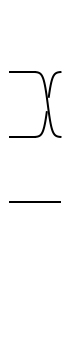

<IPython.core.display.Latex object>

In [13]:
# Draw sigma_1 operation on 3 anyons
circuit = AnyonSimulator()
circuit.braid(1, 2)
circuit.draw_circuit()
circuit.get_braids_history()

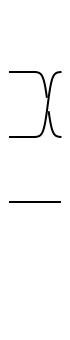

<IPython.core.display.Latex object>

In [14]:
# Draw sigma_1^(-1)
circuit = AnyonSimulator()
circuit.braid(2, 1)
circuit.draw_circuit()
circuit.get_braids_history()

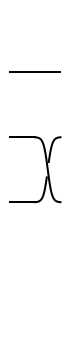

<IPython.core.display.Latex object>

In [15]:
# Draw sigma_2 
circuit = AnyonSimulator()
circuit.braid(2, 3)
circuit.draw_circuit()
circuit.get_braids_history()

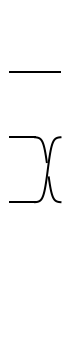

<IPython.core.display.Latex object>

In [16]:
# Draw sigma_2^(-1)
circuit = AnyonSimulator()
circuit.braid(3, 2)
circuit.draw_circuit()
circuit.get_braids_history()

### Matrix Representation of $\sigma_1$, $\sigma_2$, $\sigma_1^{-1}$ and $\sigma_2^{-1}$

$$\sigma_1 = R = \mymatrix{cc}{e^{-\frac{4i \pi}{5}} & 0 \\ 0 & e^{\frac{3i \pi}{5}}}$$

$$\sigma_2 = B = FRF^\dagger = \mymatrix{cc}{ \frac{1}{\Phi} & \frac{1}{\sqrt{\Phi}} \\ \frac{1}{\sqrt{\Phi}} & -\frac{1}{\Phi} } \mymatrix{cc}{e^{-\frac{4i \pi}{5}} & 0 \\ 0 & e^{\frac{3i \pi}{5}}} \mymatrix{cc}{ \frac{1}{\Phi} & \frac{1}{\sqrt{\Phi}} \\ \frac{1}{\sqrt{\Phi}} & -\frac{1}{\Phi} }$$

such that $\Phi$ is the Golden number :

$$\Phi^2 - \Phi = 1$$

#### Task 3

Using Numpy, calculate $\sigma_1$, $\sigma_1^{-1}$, $\sigma_2$ and $\sigma_2^{-1}$ explicitly.

In [17]:
import numpy as np

In [18]:
# Compute sigma_1
sigma_1 = np.array([[np.exp(-4 * 1j * np.pi / 5), 0],
                    [0, np.exp(3 * 1j * np.pi / 5)]])

# Show sigma_1
print(sigma_1)

[[-0.80901699-0.58778525j  0.        +0.j        ]
 [ 0.        +0.j         -0.30901699+0.95105652j]]


Since braiding matrices are unitary,
$$\sigma_i^{-1} = \sigma_i^\dagger = \overline{\sigma_i}^T$$

In [19]:
# Compute sigma_1^(-1)
sigma_1_inv = sigma_1.conjugate().T

# show sigma_1^(-1)
print(sigma_1_inv)

[[-0.80901699+0.58778525j  0.        -0.j        ]
 [ 0.        -0.j         -0.30901699-0.95105652j]]


In [20]:
# Compute the golden number
PHI = (1 + np.sqrt(5)) / 2

# Compute F matrix
F = np.array([[1 / PHI, 1 / np.sqrt(PHI)],
              [1 / np.sqrt(PHI), -1 / PHI]])

# Compute R matrix
R = sigma_1

# Compute sigma_2
sigma_2 = F @ R @ F

# show sigma_2
print(sigma_2)

[[-0.5       +3.63271264e-01j -0.24293414-7.47674391e-01j]
 [-0.24293414-7.47674391e-01j -0.61803399-9.05772050e-17j]]


In [21]:
# Compute sigma_2^(-1)
sigma_2_inv = sigma_2.conjugate().T

# Show sigma_2^(-1)
print(sigma_2_inv)

[[-0.5       -3.63271264e-01j -0.24293414+7.47674391e-01j]
 [-0.24293414+7.47674391e-01j -0.61803399+9.05772050e-17j]]


#### Task 4

Verify that $$\sigma_1 \sigma_1^{-1} = \sigma_2 \sigma_2^{-1} = I$$

In [22]:
# Verification
print(f'sigma_1 sigma_1^(-1) =\n {sigma_1 @ sigma_1_inv}\n')
print(f'sigma_2 sigma_2^(-1) =\n {sigma_2 @ sigma_2_inv}')

sigma_1 sigma_1^(-1) =
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]

sigma_2 sigma_2^(-1) =
 [[ 1.00000000e+00+0.j -1.66533454e-16+0.j]
 [-1.66533454e-16+0.j  1.00000000e+00+0.j]]


### Single Qubit Braiding Matrices as Rotations

It is convinient to represent the previous single qubit braiding matrices as rotations in the Bloch sphere since for all single qubit quantum gates $U$, 

$$U = e^{i\eta} R_{\mathbf{n}}(\alpha) = e^{i\eta}\mymatrix{rr}{\cos\left(\frac{\alpha}{2}\right)-i\sin\left(\frac{\alpha}{2}\right)n_z & -\sin\left(\frac{\alpha}{2}\right)n_y-i\sin\left(\frac{\alpha}{2}\right)n_x \\ \sin\left(\frac{\alpha}{2}\right)n_y-i\sin\left(\frac{\alpha}{2}\right)n_x & \cos\left(\frac{\alpha}{2}\right)+i\sin\left(\frac{\alpha}{2}\right)n_z}$$

<img src="./images/unitary_as_rotation.png" width="35%" align="center">

such that $\mathbf{n} = (n_x, n_y, n_z) $ and it is the **vector of rotation** and $\alpha$ is the **angle of rotation**.

$$n_z = \cos(\theta)$$

$$ n_x = \sin(\theta)\cos(\phi)$$

$$n_y = \sin(\theta)\sin(\phi)$$

##### Task 5

Show that $$\det R_\mathbf{n}(\alpha) = 1$$

which implies that $R_\mathbf{n}(\alpha)$ is a special unitary matrix.

\begin{align}
\det R_\mathbf{n}(\alpha) =& \left( \cos\left(\frac{\alpha}{2}\right)-i\sin\left(\frac{\alpha}{2}\right)n_z \right)\cdot\left( \cos\left(\frac{\alpha}{2}\right)+i\sin\left(\frac{\alpha}{2}\right)n_z \right) \\
&- \left( \sin\left(\frac{\alpha}{2}\right)n_y-i\sin\left(\frac{\alpha}{2}\right)n_x \right)\cdot\left( -\sin\left(\frac{\alpha}{2}\right)n_y-i\sin\left(\frac{\alpha}{2}\right)n_x \right)\\
=& \left( \cos\left(\frac{\alpha}{2}\right)-i\sin\left(\frac{\alpha}{2}\right)n_z \right)\cdot\left( \cos\left(\frac{\alpha}{2}\right)+i\sin\left(\frac{\alpha}{2}\right)n_z \right) \\
&+ \left( \sin\left(\frac{\alpha}{2}\right)n_y-i\sin\left(\frac{\alpha}{2}\right)n_x \right)\cdot\left( \sin\left(\frac{\alpha}{2}\right)n_y+i\sin\left(\frac{\alpha}{2}\right)n_x \right)\\
=& \cos\left(\frac{\alpha}{2}\right)^2 + \sin\left(\frac{\alpha}{2}\right)^2n_z^2 + \sin\left(\frac{\alpha}{2}\right)^2n_y^2 + \sin\left(\frac{\alpha}{2}\right)^2n_x^2\\
=& \cos\left(\frac{\alpha}{2}\right)^2 + \sin\left(\frac{\alpha}{2}\right)^2\left(n_z^2+n_y^2+n_x^2\right)\\
=& \cos\left(\frac{\alpha}{2}\right)^2 + \sin\left(\frac{\alpha}{2}\right)^2\\
=& 1
\end{align}

#### Task 6

Find numerically the coordinates of the rotation vector $\mathbf{n}$ and the rotation angle $\alpha$ for $\sigma_1$ and $\sigma_2$. Consider $\alpha > 0$

In [23]:
from math import acos, asin, sin

In [24]:
# Calculate alpha and n for sigma_1

# Calculate R_n(alpha) by eliminating the phase exp(i eta) (Given)
R_1 = sigma_1 / np.sqrt(np.linalg.det(sigma_1))

# calculate alpha (task)
alpha_1 = acos(R_1[0][0].real) * 2

# calculate n_z  (task)
nz_1 = -R_1[0][0].imag / sin(alpha_1 / 2)

# calculate n_y (task)
ny_1 = - R_1[0][1].real / sin(alpha_1 / 2)

# calculate n_x (task)
nx_1 = - R_1[0][1].imag / sin(alpha_1 / 2)

In [25]:
print(f'Angle of rotation = {alpha_1 / np.pi} {chr(0x3c0)} = {alpha_1 * 180 / np.pi} Deg ')
print(f'Vector of rotation = {(nx_1, ny_1, nz_1)}')

Angle of rotation = 1.4 π = 252.0 Deg 
Vector of rotation = (-0.0, -0.0, 1.0000000000000002)


Notice that $\sigma_1$ is just a Phase Gate or $RZ$ Gate.

In [26]:
# Calculate alpha and n for sigma_2

# Calculate R_n(alpha) by eliminating the phase exp(i eta) (Given)
R_2 = sigma_2 / np.sqrt(np.linalg.det(sigma_2))

# calculate alpha
alpha_2 = acos(R_2[0][0].real) * 2

# calculate n_z 
nz_2 = -R_2[0][0].imag / sin(alpha_2 / 2)

# calculate n_y
ny_2 = - R_2[0][1].real / sin(alpha_2 / 2)

# calculate n_x
nx_2 = - R_2[0][1].imag / sin(alpha_2 / 2)

In [27]:
print(f'Angle of rotation = {alpha_2 / np.pi} {chr(0x3c0)} = {alpha_2 * 180 / np.pi} Deg ')
print(f'Vector of rotation = {(nx_2, ny_2, nz_2)}')

Angle of rotation = 1.4 π = 252.0 Deg 
Vector of rotation = (0.9717365435132914, -6.525727206302103e-17, -0.23606797749978986)


Notice that $\sigma_2$ rotation vector is on the xz plane as Hadamard Gate.

#### Task 7

Repeat the same procedure for $\sigma_1^{-1}$ and $\sigma_2^{-1}$. What do you expect about the vector and angle of rotation?

#### Solution

Since $\alpha$ is considered positive, $\sigma_1^{-1}$ should have the same rotation angle as $\sigma_1$ but with minus signed vector of rotation.

In [28]:
# Calculate alpha and n for sigma_1^(-1)

# Calculate R_n(alpha) by eliminating the phase exp(i eta)
R_1_inv = sigma_1_inv / np.sqrt(np.linalg.det(sigma_1_inv))

# calculate alpha
alpha_1_inv = acos(R_1_inv[0][0].real) * 2

# calculate n_z 
nz_1_inv = -R_1_inv[0][0].imag / sin(alpha_1 / 2)

# calculate n_y
ny_1_inv = - R_1_inv[0][1].real / sin(alpha_1 / 2)

# calculate n_x
nx_1_inv = - R_1_inv[0][1].imag / sin(alpha_1 / 2)

In [29]:
print(f'Angle of rotation = {alpha_1_inv / np.pi} {chr(0x3c0)} = {alpha_1_inv * 180 / np.pi} Deg ')
print(f'Vector of rotation = {(nx_1_inv, ny_1_inv, nz_1_inv)}')

Angle of rotation = 1.4 π = 252.0 Deg 
Vector of rotation = (0.0, -0.0, -1.0000000000000002)


## Universality of Single Qubit Braiding Operators

Do you think that different sequences of $\sigma_1$, $\sigma_1^{-1}$, $\sigma_2$ and $\sigma_2^{-1}$ can implement any arbitrary single qubit quantum gates?



In other words, starting from the state $\ket{0} = \mymatrix{r}{1 \\ 0}$, we should approximate all the states on the Bloch sphere using the right combinations of braiding operations with a specific length.

In [30]:
from qiskit.tools.visualization import plot_bloch_vector
import math

def polar(z):
    """
    This function returns the polar form [r, theta] of the complex number z.
    """
    a = z.real
    b = z.imag
    r = math.hypot(a, b)
    theta = math.atan2(b, a)
    return r, theta
    
def bloch_vector(state):
    """
    This function returns the Cartesian coordinates [x, y, z] of the vector that represents
    the input quantum state in the Bloch sphere.
    """
    c, eta = polar(state[0])
    s, phi = polar(state[1])
    phi += -eta
    theta = math.atan2(s, c) * 2
    x = math.sin(theta) * math.cos(phi)
    y = math.sin(theta) * math.sin(phi)
    z = math.cos(theta)
    return x, y, z
    

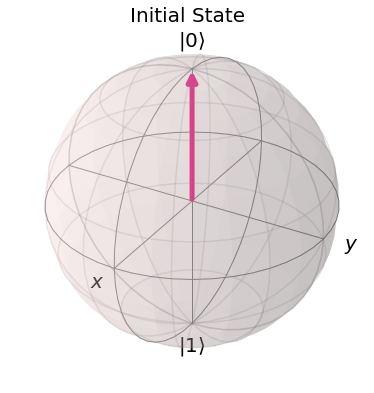

In [31]:
# Plot the quantum state |0> on the Bloch sphere
plot_bloch_vector(bloch_vector([1, 0]), title='Initial State')


#### Task 8

Apply the braiding operation $\sigma_1$, $\sigma_1^{-1}$, $\sigma_2$ and $\sigma_2^{-1}$ on $\ket{0}$ and plot the final quantum state.

x =  -0.0 
y =  0.0 
z =  1.0


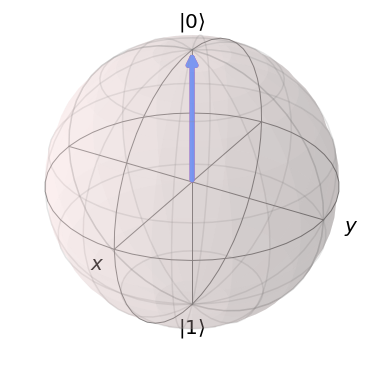

In [32]:
# compute sigma_1 |0>
final_state = sigma_1 @ np.array([1, 0])

# plot sigma_1 |0>
x, y, z = bloch_vector(final_state)
print('x = ', round(x, 2),
      '\ny = ', round(y, 2),
      '\nz = ', round(z, 2))

plot_bloch_vector([[0, 0, 1], [x, y, z]])


Notice that $\sigma_1$ does not affect the Bloch vector of $\ket{0}$ because it is an RZ rotation.

x =  -0.0 
y =  -0.0 
z =  1.0


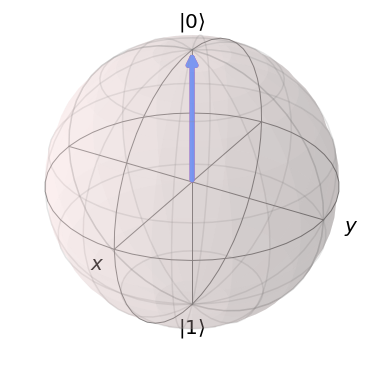

In [33]:
# compute sigma_1^(-1) |0>
final_state = sigma_1_inv @ np.array([1, 0])

# plot sigma_1 |0>
x, y, z = bloch_vector(final_state)
print('x = ', round(x, 2),
      '\ny = ', round(y, 2),
      '\nz = ', round(z, 2))

plot_bloch_vector([[0, 0, 1], [x, y, z]])

x =  -0.3 
y =  0.92 
z =  -0.24


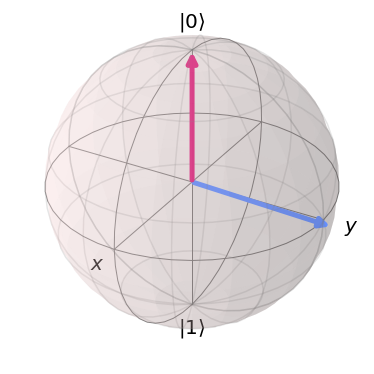

In [34]:
# compute sigma_2 |0>
final_state = sigma_2 @ np.array([1, 0])

# plot sigma_1 |0>
x, y, z = bloch_vector(final_state)
print('x = ', round(x, 2),
      '\ny = ', round(y, 2),
      '\nz = ', round(z, 2))

plot_bloch_vector([[0, 0, 1], [x, y, z]])

x =  -0.3 
y =  -0.92 
z =  -0.24


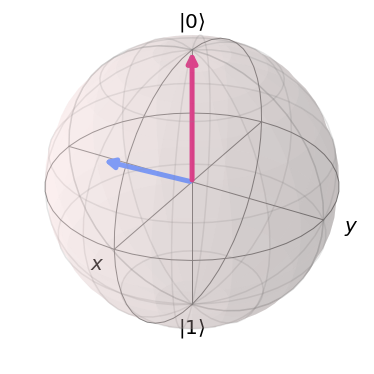

In [35]:
# compute sigma_2^(-1) |0>
final_state = sigma_2_inv @ np.array([1, 0])

# plot sigma_1 |0>
x, y, z = bloch_vector(final_state)
print('x = ', round(x, 2),
      '\ny = ', round(y, 2),
      '\nz = ', round(z, 2))

plot_bloch_vector([[0, 0, 1], [x, y, z]])

#### Task 9

Now, show in the Bloch sphere all possible states that we can obtain by applying $\sigma_i^p \sigma_j^q$ on the state $\ket{0}$ such that $|p| + |q| = 2$

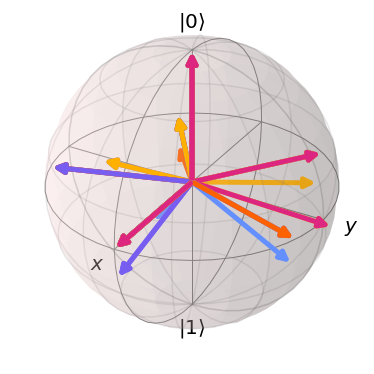

In [36]:
SIGMA = [sigma_1, sigma_1_inv, sigma_2, sigma_2_inv]
POWER = [0, 1, 2]
INITIAL_STATE = np.array([1, 0])

final_states = []
for p in POWER:
    for q in POWER:
        if p + q == 2:
            for sigma_i in SIGMA:
                for sigma_j in SIGMA:
                    
                    #  YOUR CODE
                    final_state = sigma_i**p @ sigma_j**q @ INITIAL_STATE
                    final_states.append(final_state)

# plot 
vectors = []
for final_state in final_states:
    x, y, z = bloch_vector(final_state)
    vectors.append([x, y, z])

plot_bloch_vector(vectors)

#### Task 10

Repeat the task 8 for $\sigma_i^p \sigma_j^q \sigma_k^r$

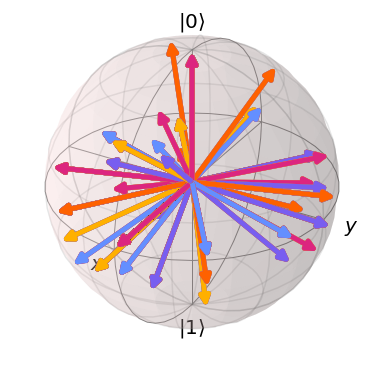

In [37]:
SIGMA = [sigma_1, sigma_1_inv, sigma_2, sigma_2_inv]
POWER = [0, 1, 2, 3]
INITIAL_STATE = np.array([1, 0])

final_states = []
for p in POWER:
    for q in POWER:
        for r in POWER:
            if p + q + r == 3:
                for sigma_i in SIGMA:
                    for sigma_j in SIGMA:
                        for sigma_k in SIGMA:

                            #  YOUR CODE
                            final_state = sigma_i**p @ sigma_j**q @ INITIAL_STATE
                            final_states.append(final_state)

# plot 
vectors = []
for final_state in final_states:
    x, y, z = bloch_vector(final_state)
    vectors.append([x, y, z])

plot_bloch_vector(vectors)

In [38]:
# it is better to use an iterator to avoid nested loops
def iterator(length, n_max):
    vector = []
    final_vector = []
    for ii in range(length):
        vector.append(0)
        final_vector.append(n_max)
    yield vector
    while vector != final_vector:
        for ii, v in enumerate(vector):
            if v == n_max:
                vector[ii] = 0
            else:
                vector[ii] += 1
                break
        yield vector

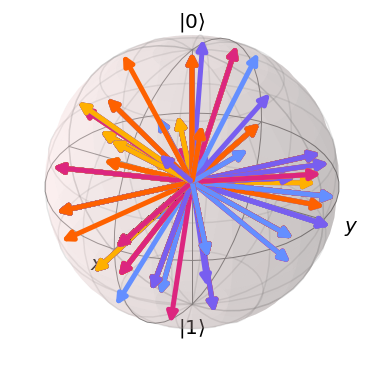

In [39]:
SIGMA = [sigma_1, sigma_1_inv, sigma_2, sigma_2_inv]
POWER = [0, 1, 2, 3]
INITIAL_STATE = np.array([1, 0])

final_states = []
for powers in iterator(3, 3):
    if sum(powers) == 3:
        for sigmas in iterator(3, 3):
            final_state = SIGMA[sigmas[2]]**powers[2] @ SIGMA[sigmas[1]]**powers[1] @ SIGMA[sigmas[0]]**powers[0] @INITIAL_STATE
            final_states.append(final_state)

# plot 
vectors = []
for final_state in final_states:
    x, y, z = bloch_vector(final_state)
    vectors.append([x, y, z])

plot_bloch_vector(vectors)

#### Task 10

Repeat Task 9 for arbitrary number $L$ of braiding operators. Try $L=4$.

CAUTION! Be careful of memory crashes!

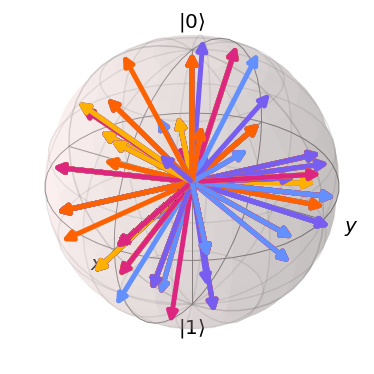

In [40]:
L = 3
SIGMA = [sigma_1, sigma_1_inv, sigma_2, sigma_2_inv]
POWER = np.linspace(0, L, L+1)
INITIAL_STATE = np.array([1, 0])


final_states = []
for powers in iterator(L, L):
    if sum(powers) == L:
        for sigmas in iterator(L, 3):
            final_state = INITIAL_STATE
            for ii in range(L):
                final_state = SIGMA[sigmas[ii]]**powers[ii] @ final_state
            final_states.append(final_state)

# plot 
vectors = []
for final_state in final_states:
    x, y, z = bloch_vector(final_state)
    vectors.append([x, y, z])

plot_bloch_vector(vectors)

### Conclusion

Notice that if $L$ is big enough, the states obtained by applying braiding combinations on the state $\ket{0}$ can be dense in the Bloch sphere. As a result, we can approximate any signle qubit quantum gate by using only Fibonacci elementary braiding operators.

## Approximating Single Qubit Quantum Gates with Braiding Operations

There are many algorithms that can be used to approximate a given single qubit quantum gate with a sequence of bradiing operations:
1. ##### Brute-force algorithm: [Ref](https://iopscience.iop.org/article/10.1088/1742-6596/1766/1/012029)
We can search numerically all possible combinations of braiding sequences to find the best one that is closer to the given quantum gate. Since the search space grows exponentially, the brute-force algorithm is exhaustive. However, it can be enhanced by including the properties of braiding operations. Moreover, the result of bruteforcing is optimal.
2. ##### Solovay-Kitaev algorithm: [Ref](https://arxiv.org/pdf/quant-ph/0505030.pdf)
It is an iterative algorithm. It is efficient since it can approximate a given quantum gate with braiding sequence in polylogarithmic time $O(\log^c(1/\epsilon)$ where $\epsilon$ is the approximation error.
3. #### Machine learning algorithms: [Ref1](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.125.170501) [Ref2](https://arxiv.org/abs/1912.12002)

It is based on using one of machine learning algorithms such as evolutionary algorithm, Markov decision process, deep learning, ...

4. #### Systematic algorithms: 
For Fibonacci braiding matrices, there exists a systematic algorithm that can approximate some single qubit quantum gates in an exact computable method.

### Properties of Signle Qubit Braiding Operations

#### a. Similarity Relation 

##### Task 11
Using the definition of $\sigma_2$ and show that $$\sigma_2 = F \sigma_1 F$$

##### Solution

$\sigma_2 = B = FRF^\dagger$

Since $R = \sigma_1$ and $F=F^\dagger$, then,

$$\sigma_2=𝐹\sigma_1𝐹$$
$$\sigma_1=𝐹\sigma_2𝐹$$

#### b. Yang-Baxter Relation

Yang-Baxter equations are the algebra of braiding operations.

##### Task 12

Prove that $$\sigma_1 \sigma_2 \sigma_1 = \sigma_2 \sigma_1 \sigma_2$$

##### Solution

Using similarity relation between $\sigma_1$ and $\sigma_2$, we can prove directly Yang-Baxter relation.

#### c. Braiding Operations as Square Roots of Identity

##### Task 13

Prove that $$\sigma_1^{10} = \sigma_2^{10} = I$$ 

##### Solution 

$\sigma_1 = \mymatrix{cc}{e^{-i\frac{4\pi}{5}} & 0 \\ 0 & e^{i\frac{3\pi}{5}}}$

Then,

$\sigma_1^{10} = \mymatrix{cc}{e^{-i 8\pi} & 0 \\ 0 & e^{i6\pi} }= \mymatrix{cc}{1 & 0 \\ 0 & 1} = I$

Using similarity relation, we conclude that:

$\sigma_2^{10} = \sigma_1^{10} = I$

Hence,

$$\sigma_1^{-1} = \sigma_1^9$$

#### Remarks

We should be aware of the properties of braiding operations when designing algorithms to approximate quantum gates. Namely, the periodicity of braiding operations imposes constraint on the possible values of braiding powers. 

### Weaves vs Braids

In a paper by [Simon et. al.](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.96.070503), it is proven that we can move only one anyon to approximate arbitrary quantum gates. Braiding with one anyon is called weaving. The benefit of weaving sequences is to make the control of anyons technically simpler in experiment. It is shown by [Funazawa et. al.](https://iopscience.iop.org/article/10.1088/1742-6596/2323/1/012035/meta) recently that weaving can be faster than braiding.

In the case of 3 Fibonacci anyons, weaves can be constructed by braiding sequences of only $\sigma_1^2$ and $\sigma_2^2$.

To verify this fact, let's use the Simulator again!


##### Task 14

Check that $\sigma_1^2 \sigma_2^2 \sigma_1^4 \sigma_2^{-2}$ is a weaving sequence.


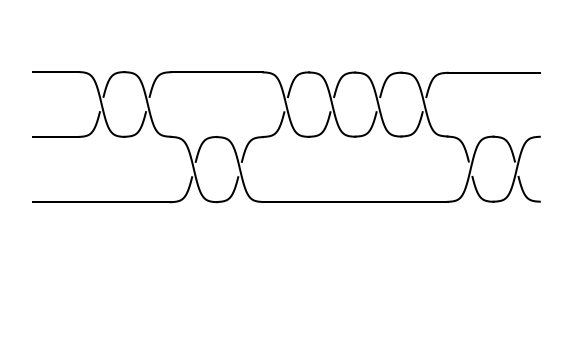

<IPython.core.display.Latex object>

In [41]:
circuit = AnyonSimulator()
circuit.braid(1, 2)
circuit.braid(1, 2)
circuit.braid(2, 3)
circuit.braid(2, 3)
circuit.braid(1, 2)
circuit.braid(1, 2)
circuit.braid(1, 2)
circuit.braid(1, 2)
circuit.braid(3, 2)
circuit.braid(3, 2)
circuit.draw_circuit()
circuit.get_braids_history()

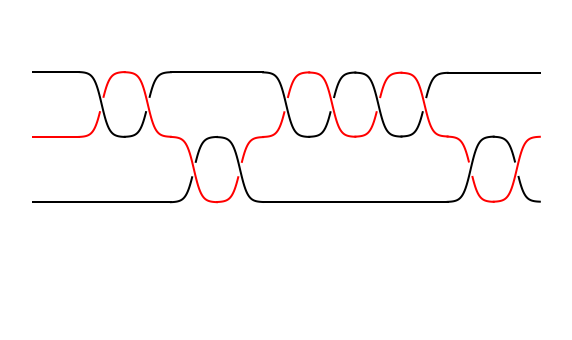

In [42]:
# to highlight the weft strand, we can use additional args
circuit.draw_circuit(colors={"1_2" : 'r'})

Notice that the red strand represents the path of the only moving anyon. Other anyons does not change their positions.

### Mini-Project

Choose one of the algorithms mentioned above to find Hadamard and T Gate using your favorite programming language. Try to find the best braiding sequence with length $L=10, 20, 30$.


Let's see how Hadamard and T gates are approximated by Fibonacci braiding operations! 

We targeted H and T gates because they can approximate any single qubit quantum gate!

### Example: Hadamard Gate

##### Task 13

Create a function that applies a given list of braids on _AnyonSimulator_.

In [43]:
import numpy as np
def braid(circuit, braids):
    """
    This function applies the list of braids [[i_1, p_1], [i_2, p_2], ... [i_L, p_L]]
    on a circuit of AnyonSimulator type.
    """
    for braid_ in braids:
        index = braid_[0]
        power = braid_[1]
        power_sign = np.sign(power)
        if power_sign > 0:
            for ii in range(abs(power)):
                circuit.braid(index, index + 1)
        elif power_sign < 0:
            for ii in range(abs(power)):
                circuit.braid(index + 1, index)

In [44]:
# Example
braiding_sequence = [[1, 2], [2, 4], [1, -2]]
circuit = AnyonSimulator()
braid(circuit, braiding_sequence)
circuit.get_braids_history()

<IPython.core.display.Latex object>


#### Task 14

Show that the following weaving sequence of length 30 approximates Hadamard gate up to a global phase:

$$H \approx \sigma_1^{-2}\sigma_2^{-2}\sigma_1^{2} \sigma_2^{2} \sigma_1^{-2} \sigma_2^{-4} \sigma_1^{2} \sigma_2^{-2} \sigma_1^{-2} \sigma_2^{2} \sigma_1^{-2} \sigma_2^{2} \sigma_1^{-4}$$

In [45]:
# Hadamard weaving sequence
hw = [[1, -4], [2, 2], [1, -2], [2, 2], [1, -2], [2, -2], [1, 2], [2, -4], [1, -2], [2, 2],
      [1, 2], [2, -2], [1, -2]]

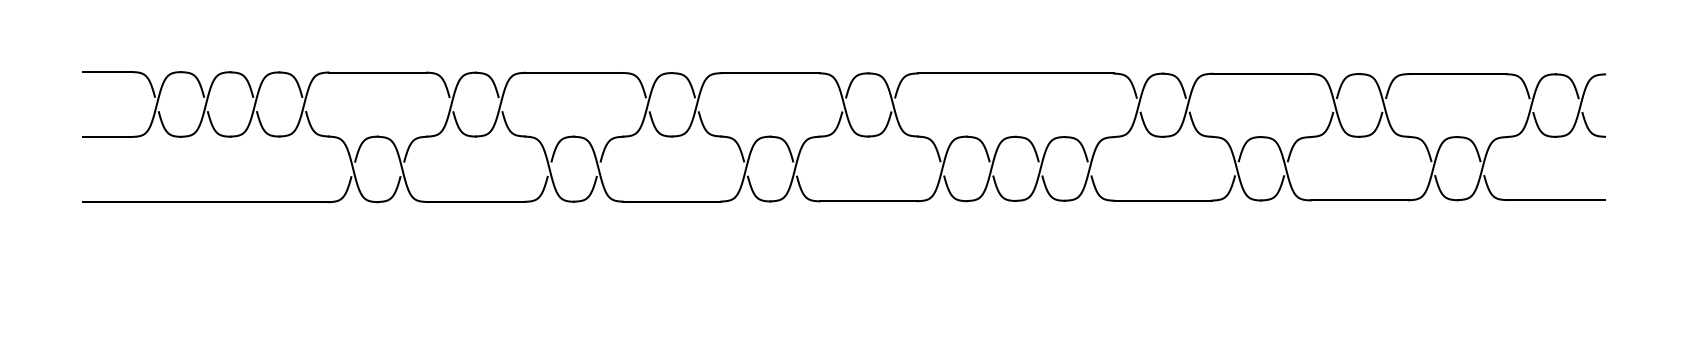

<IPython.core.display.Latex object>

In [46]:
# Draw Hadamard weaving sequence
hc = AnyonSimulator()
braid(hc, hw)
hc.draw_circuit()
hc.get_braids_history()

Use this distance function to measure the disrance between the braiding sequence and the target Hadamard gate.

In [47]:
# distance metric
def distance(w, u):
    """
    This function calculates the Hilbert-Schmidt distance between two unitaries w and u 
    up to a global phase.
    """
    res = w.T.conjugate() @ u
    tr = np.trace(res)
    return 1 - ( 1 / w.shape[0]**2 ) * (tr.conjugate() * tr).real

In [48]:
I = np.array([[1, 0],
              [0, 1]])
HADAMARD = np.array([[1, 1], 
                     [1, -1]]) / np.sqrt(2)
sigma = {1 : {1 : sigma_1, -1 : sigma_1_inv},
         2 : {1 : sigma_2, -1 : sigma_2_inv}}

L = 0
unitary = I
for weave in hw:
    for ii in range(abs(weave[1])):
        L += 1
        if weave[1] > 0:
            unitary = sigma[weave[0]][1] @ unitary
        else:
            unitary = sigma[weave[0]][-1] @ unitary

print(f'Hadamard = \n{HADAMARD}')
print(f'\nBraiding Sequence = \n{unitary}')
print(f'\nd(Hadamard, Braiding Sequence) = {distance(unitary, HADAMARD)}')

Hadamard = 
[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]

Braiding Sequence = 
[[ 0.00392529+0.70994899j  0.00337405+0.70423408j]
 [-0.00337405+0.70423408j  0.00392529-0.70994899j]]

d(Hadamard, Braiding Sequence) = 4.312224686764399e-05


### Example: T Gate

#### Task 15

Show that the following weaving sequence of length 30 approximates T gate up to a global phase:

$$T \approx \sigma_2^{-2}\sigma_1^{4} \sigma_2^{-2} \sigma_1^{4} \sigma_2^{-2} \sigma_1^{-2} \sigma_2^{2} \sigma_1^{2} \sigma_2^{4} \sigma_1^{-2} \sigma_2^{2} \sigma_1^{2}$$

In [49]:
# T Gate weaving sequence
tw = [[1, 2], [2, 2], [1, -2], [2, 4], [1, 2], [2, 2], [1, -2], [2, -2], [1, 4], [2, -2],
        [1, 4], [2, -2]]

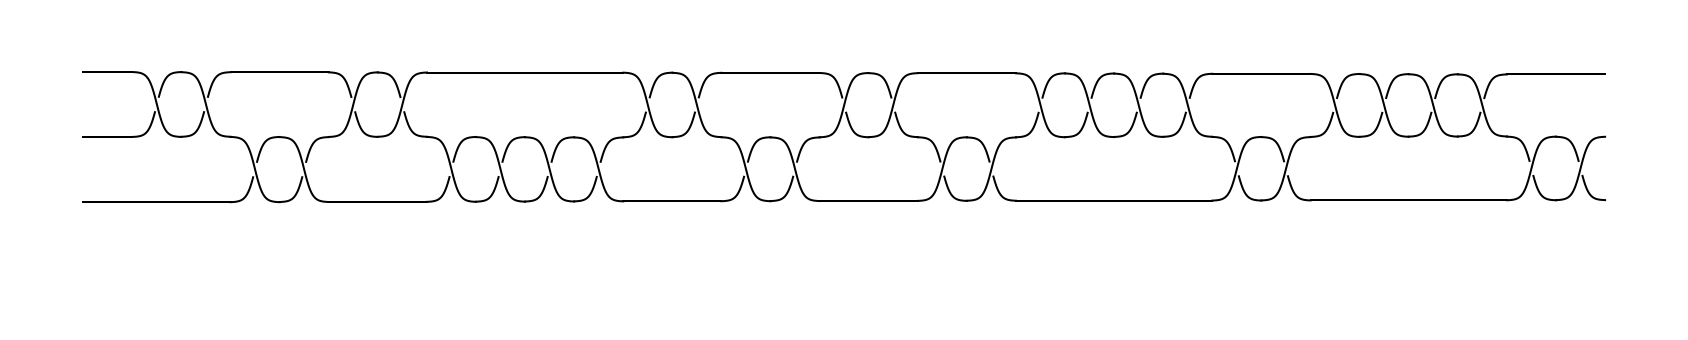

<IPython.core.display.Latex object>

In [50]:
# Draw Hadamard weaving sequence
tc = AnyonSimulator()
braid(tc, tw)
tc.draw_circuit()
tc.get_braids_history()

In [51]:
I = np.array([[1, 0],
              [0, 1]])
TGATE = np.array([[1, 0], 
                  [0, np.exp(1j * np.pi / 4)]])
sigma = {1 : {1 : sigma_1, -1 : sigma_1_inv},
         2 : {1 : sigma_2, -1 : sigma_2_inv}}

L = 0
unitary = I
for weave in tw:
    for ii in range(abs(weave[1])):
        L += 1
        if weave[1] > 0:
            unitary = sigma[weave[0]][1] @ unitary
        else:
            unitary = sigma[weave[0]][-1] @ unitary

print(f'length = {L}')
print(f'T = \n{TGATE}')
print(f'\nBraiding Sequence = \n{unitary}')
print(f'\nd(T, Braiding Sequence) = {distance(unitary, TGATE)}')

length = 30
T = 
[[1.        +0.j         0.        +0.j        ]
 [0.        +0.j         0.70710678+0.70710678j]]

Braiding Sequence = 
[[-0.91810069+0.39629374j -0.00545933+0.00354769j]
 [ 0.00545933+0.00354769j -0.91810069-0.39629374j]]

d(T, Braiding Sequence) = 0.0002610088748282724


## More on the Simulator (Optional)

The simulator provides the numerical representation of the clockwise braiding matrices. However, it includes the non-computational state too! So, the braiding matrices of 3 Fibonacci anyons in the simulator are 3 dimensional!

In [52]:
# Get sigmas
circuit = AnyonSimulator()
sigmas = circuit._s

In [53]:
# to illustrate matrices, we use cplot function
from cplot import cplot

$\sigma_1$

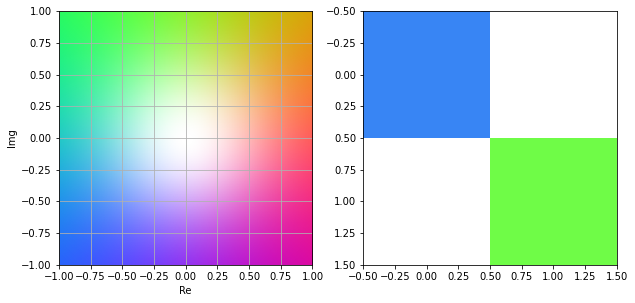

In [54]:
cplot(sigmas[0][1::, 1::])

$\sigma_1^{-1}$

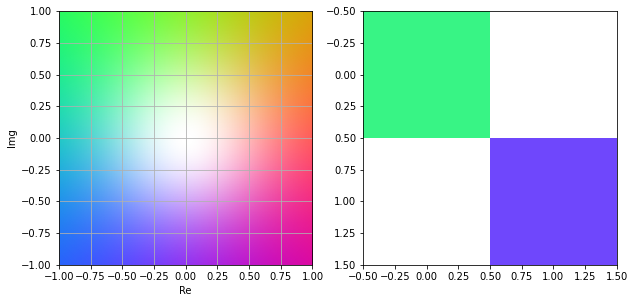

In [55]:
cplot(sigmas[0][1::, 1::].T.conjugate())

$\sigma_2$

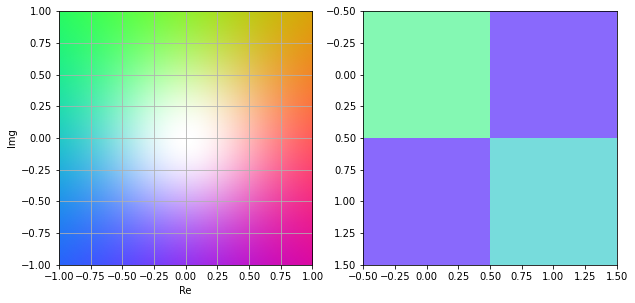

In [56]:
cplot(sigmas[1][1::, 1::])

$\sigma_2^{-1}$

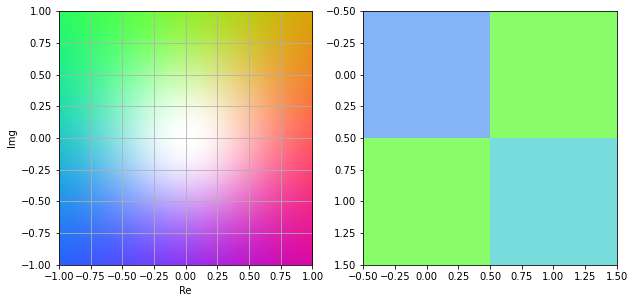

In [57]:
cplot(sigmas[1][1::, 1::].T.conjugate())